In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# 1. 데이터 수집
ticker = "INTC"
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close
Ticker,INTC
Date,
2015-01-02,27.896463
2015-01-05,27.581890
2015-01-06,27.067842
2015-01-07,27.635592
2015-01-08,28.149643


In [4]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [6]:
look_back = 60 # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # LSTM 입력 형태

In [7]:
# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

c:\AIProject\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [10]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0688 - val_loss: 0.0030
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.7

In [11]:
# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [12]:
# 실제값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

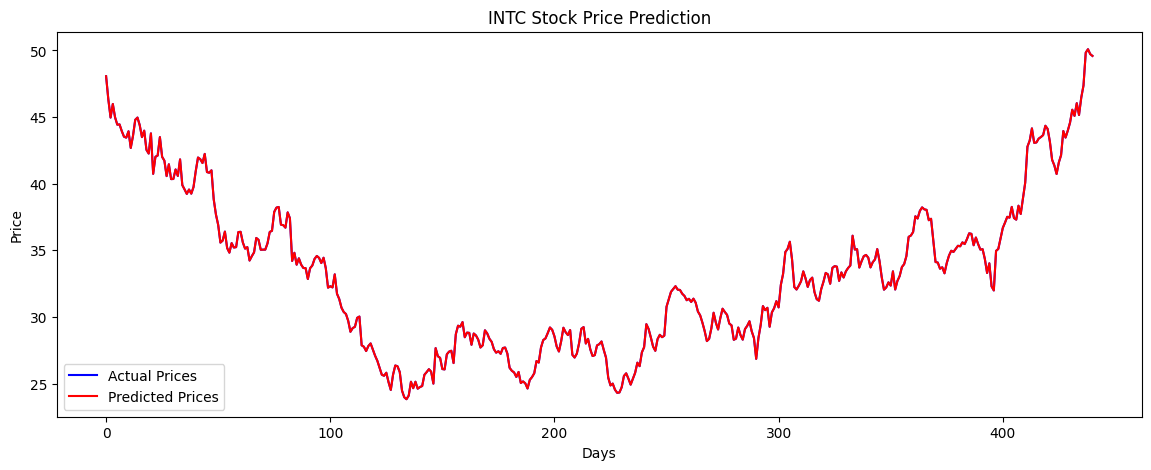

In [13]:
# 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predictions, label="Predicted Prices", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()